### Quantum Cryptography - Day10
# Bell Inequality and Evesdropper Detection
In quantum cryptography .security is guarenteed by the laws of qunatum mechanic rather than compuational assumption.one of the most powerful tool is verify the presence of genuine quantum correlation (entanglement) **Bell's Inequility**.Bell's inequility allows us to:
- Distinguish **classical correlation** form **Qunatum Correlation**
- Detect whether an **evedropper (Eve)**  has interfared with the quantum channel
- Verify Device-indpenedent security in Quantum Key distribution(QKD).

In this notebook , we focus on the **CHSH ineqaulity**,a practical and widely used bell test.In this we will learn:
- Understand Bell Inequality and the CHSH formulation
- Implement the CHSH test using quantum measurement
- Calculate the Bell parameters(S value)
- compare classical and quantum bound
- Visualize Bell inequality violation
- Understand how bell violation helps detect an evesdropper(Eve)

## Bell Ineqaulity and CHSH Formulation
The CHSH inequality is given by:
S= E(A,B) +E(A,B')+E(A',B)-E(A',B')
where:
- A,A' are measurement setting for Alice
- B,B' are measurement setting for Bob
- E(X,Y) is expection value of measurement

### Bound :
- Classical (Local Hidden Variables) B?ound : |S|<=2
- Quantum Mechanical Bound (Tsitrelson Bound) : |S|<= $2 \sqrt{2}$ near to  2.828
- If |S|>2 -> **Quantum Entanglement exists**
- If |S|<=2 -> System behave classically (or Eve is interfering)

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Measurement Correlation Function
- Correlation  Function : The correalation function E(a,b) for entangled qubit is defined as: E(a,b) = -cos($\theta_a - \theta_\beta$)
This formula comes from quantum mechanic for a maximally entangled Bell state.it tells us how strongly Alice and Bob's measurement outcomes are correlated.

In [11]:
def correlation(theta_a,theta_b):
    # Computes quantum correalation between Alice and bob based on measurement angles.
    return -np.cos(theta_a - theta_b)

## CHSH Test Implementation
we now define four measurement angles:
- A,A' For Alice
- B,B' for bob

these angles are choosen to maximize bell ineuality violation

In [14]:
A = 0
A_prime=np.pi/2
B=np.pi/4
B_prime=-np.pi/4

E_AB=correlation(A,B)
print("E_AB=",E_AB)
E_ABp=correlation(A,B_prime)
print("E_ABp=",E_ABp)
E_ApB=correlation(A_prime,B)
print("E_ApB=",E_ApB)
E_ApBp=correlation(A_prime,B_prime)
print("E_ApBp=",E_ApBp)
S=E_AB+E_ABp+E_ApB-E_ApBp
abs(S)


E_AB= -0.7071067811865476
E_ABp= -0.7071067811865476
E_ApB= -0.7071067811865476
E_ApBp= 0.7071067811865475


np.float64(2.8284271247461903)

## Interprtation of Bell Parameter
- If |S|<= -> classical correalation only
- If 2 < |S| <= $2\sqrt{2}$ - Quantum Entanglement Detection
- If  S drops toward 2 -> Possible noise or Eve's interference.

A strong violation means:
- secure Quantum Channel
- No evedropper detected

## Classical Vs Quantum Comparision
we now compare :
- Classical Limit
- Quantum mechanical limit
- Our calculated S value

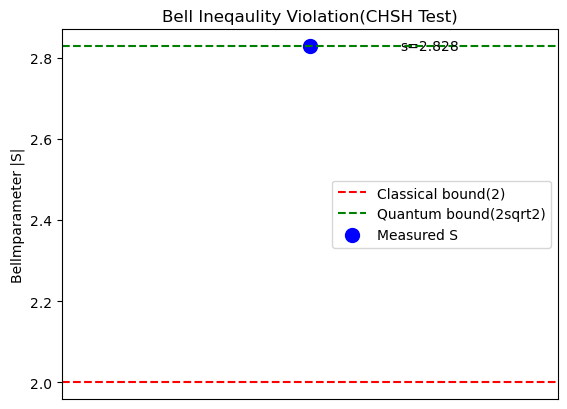

In [15]:
classical_bound=2
quantum_bound=2*np.sqrt(2)
plt.Figure(figsize=(7,5))
plt.axhline(classical_bound,color='red',linestyle='--',label='Classical bound(2)')
plt.axhline(quantum_bound,color='green',linestyle='--',label='Quantum bound(2sqrt2)')
plt.scatter(1,abs(S),color='blue',s=100,label='Measured S')
plt.text(1.02,abs(S),f"s={abs(S):.3f}",verticalalignment='center')
plt.ylabel("Bellmparameter |S|")
plt.xticks([])
plt.legend()
plt.title("Bell Ineqaulity Violation(CHSH Test)")
plt.show()

The graph shows a cleare violation of Bell's inequality ,with the measured CHSH parameter |S| near 2.83 excedding the classical bound  of 2 and approchong the quantum limit 2 $\sqrt{2} $ ,confirming the prsence of quantum entanglement and absence of evesdropper.

## Detecting Eve(Evesdropper)
If Eve measure or interact with the quantum channel:
- Entangled is reduced
- correaltio weaken
- Bell violation decreases

In extreme cases:
- S<=2
- Quantum channel become classical
- Eve detected immedietly

This make Bell test a powerful **device-independent security check**

---

**Author** : Shreya Palase

**Repository**: Quantum-Cryptography(codeQubit)

**file** : day10_Bell_Inequality_and_Evesdropper_Detection.ipynb

**Date created**: 02-February-2026

<sub>© Shreya Palase- All Rights Reserved.This notebook is part of a structured learning series designed for Github publication.</sub>